# Google Playstore Rating Prediction

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'
### Dataset Link: https://www.kaggle.com/lava18/google-play-store-apps

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams
from sklearn import tree

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [2]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/Final_assignment/googleplaystore.csv'

df = pd.read_csv(file_name, header=0)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.memory_usage()

Index               128
App               86728
Category          86728
Rating            86728
Reviews           86728
Size              86728
Installs          86728
Type              86728
Price             86728
Content Rating    86728
Genres            86728
Last Updated      86728
Current Ver       86728
Android Ver       86728
dtype: int64

In [6]:
df.memory_usage().sum()

1127592

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.mean()

Rating    4.193338
dtype: float64

In [9]:
df.var()

Rating    0.288832
dtype: float64

In [10]:
df.skew()

Rating    0.595637
dtype: float64

In [11]:
df.kurtosis()

Rating    65.994781
dtype: float64

In [12]:
df.min()

App             "i DT" Fútbol. Todos Somos Técnicos.
Category                                         1.9
Rating                                           1.0
Reviews                                            0
Size                                          1,000+
Installs                                           0
Price                                          $0.99
Genres                                        Action
Last Updated                                  1.0.19
dtype: object

In [13]:
df.max()

App             🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Category                                                 WEATHER
Rating                                                      19.0
Reviews                                                     9992
Size                                          Varies with device
Installs                                                    Free
Price                                                   Everyone
Genres                                                      Word
Last Updated                                   September 9, 2017
dtype: object

In [14]:
df.median()

Rating    4.3
dtype: float64

In [15]:
df.corr()

,Rating
Rating,1.0


In [16]:
to_remove=list(df[~df.Reviews.str.isnumeric()].index)
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df=df.drop(df.index[to_remove])

In [18]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [19]:
extra=['+',',','$']
cols=['Installs','Price']
for item in extra:
    for col in cols:
        df[col]=df[col].str.replace(item,'')

In [20]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [21]:
df['Reviews'] = df['Reviews'].astype('int')
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# Segregating Date for prediction
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Updated_Day']=df['Last Updated'].dt.day
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year
df.drop('Last Updated', axis=1, inplace=True)

In [23]:
 df.isna().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Updated_Day          0
Updated_Month        0
Updated_Year         0
dtype: int64

In [24]:
df.dropna(inplace=True)
df.isna().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Updated_Day       0
Updated_Month     0
Updated_Year      0
dtype: int64

In [25]:
duplicate = df.duplicated()
print(duplicate.sum())
df.drop_duplicates(inplace=True)
duplicate = df.duplicated()
print(duplicate.sum())

305
0


In [26]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [27]:
num_data = df[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [28]:
for variable in num_data.columns:
    quartile1 = num_data[variable].quantile(0.10)
    quartile3 = num_data[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    num_data.loc[(num_data[variable] < low_limit), variable] = low_limit
    num_data.loc[(num_data[variable] > up_limit), variable] = up_limit

## Data Exploration

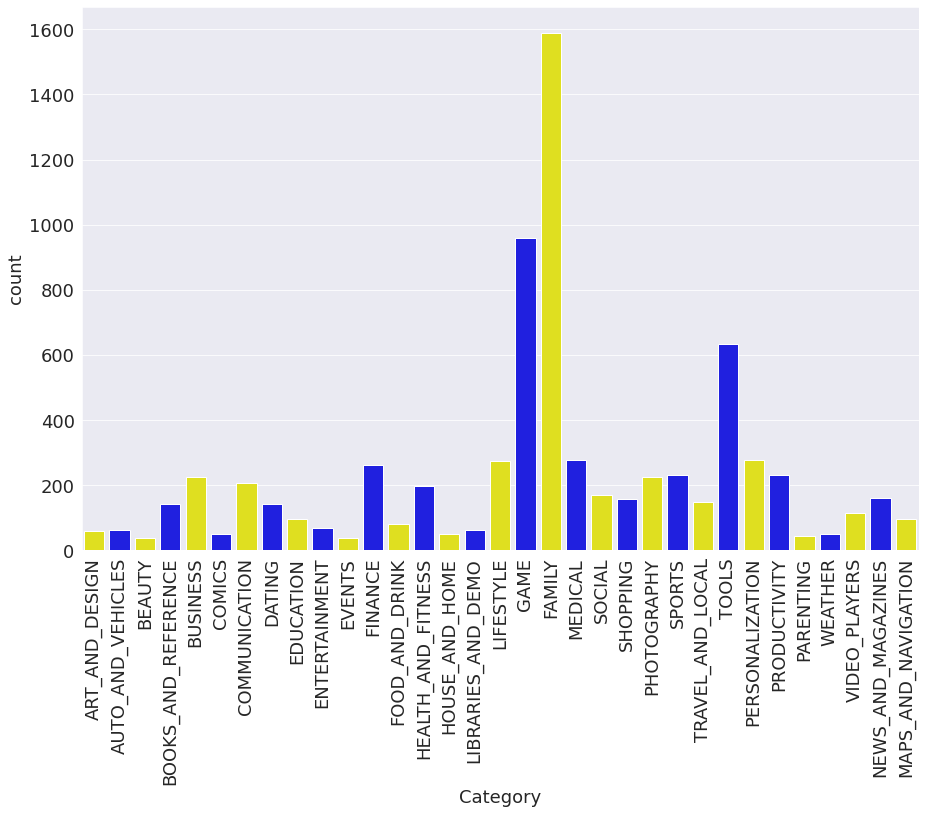

In [29]:
plt.figure(figsize=(15,10))
colors = ['yellow','blue']
sns.countplot(x='Category',data=df,palette=colors)
plt.xticks(rotation=90)
plt.show()

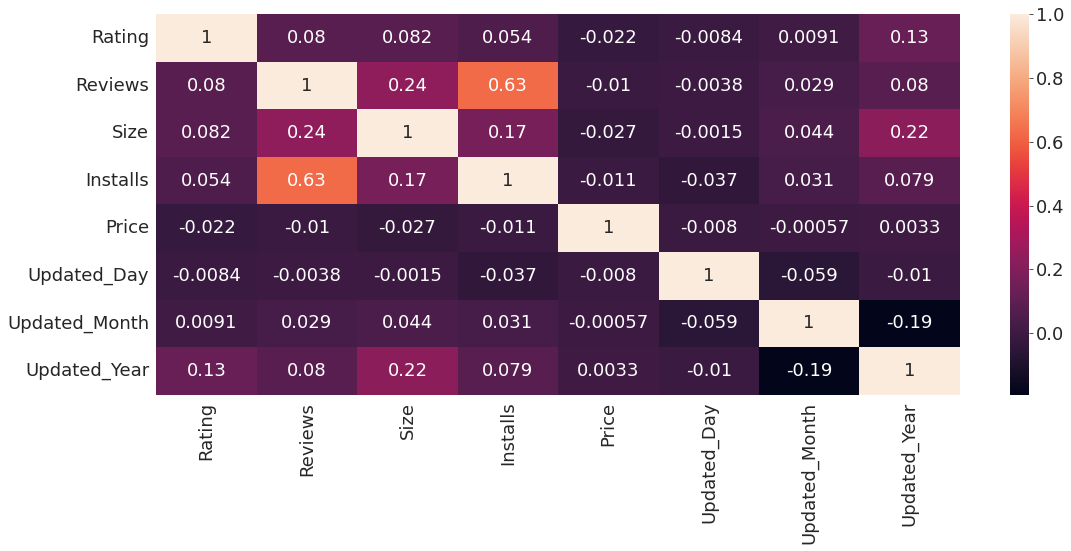

In [30]:
sns.heatmap(df.corr(), annot=True);

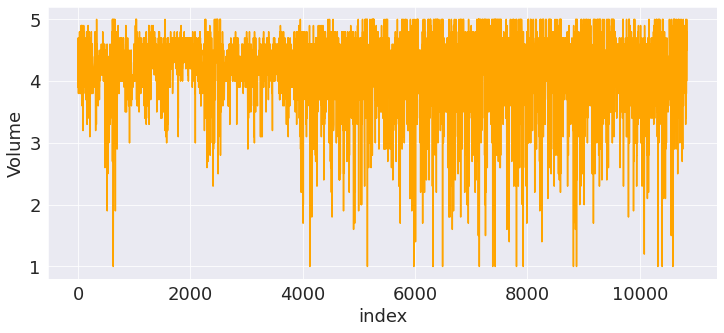

In [31]:
df['Rating'].plot(figsize=(12, 5), color='orange') # color and figsize changed

plt.xlabel('index')
plt.ylabel('Volume');

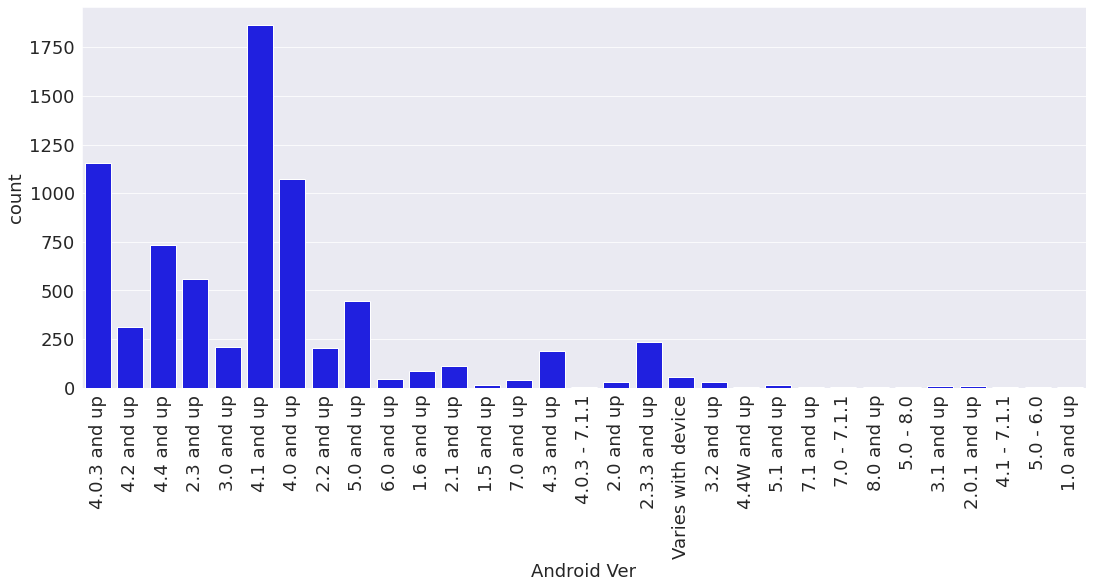

In [32]:
sns.countplot(x='Android Ver',data=df,color='blue')
plt.xticks(rotation=90)
plt.show();

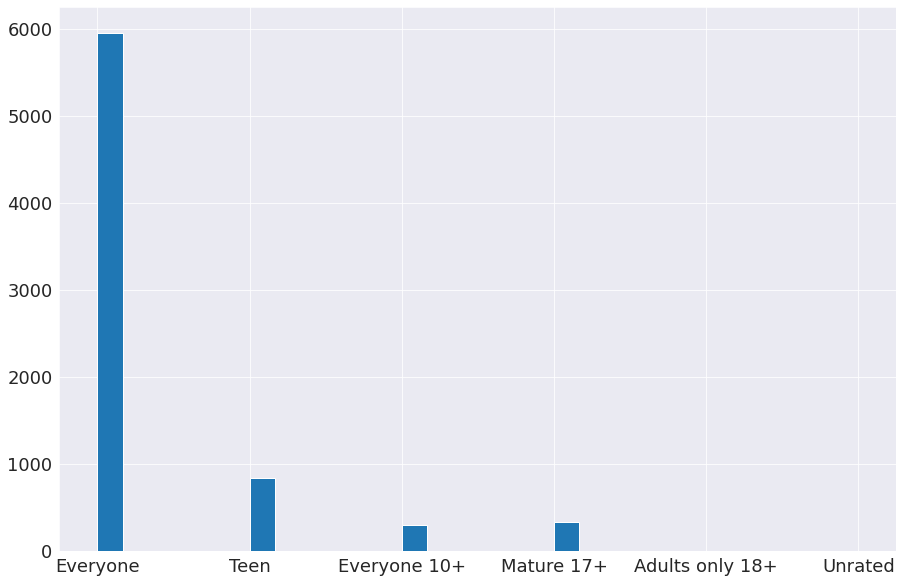

In [33]:
df['Content Rating'].hist(bins=30, figsize=(15, 10));

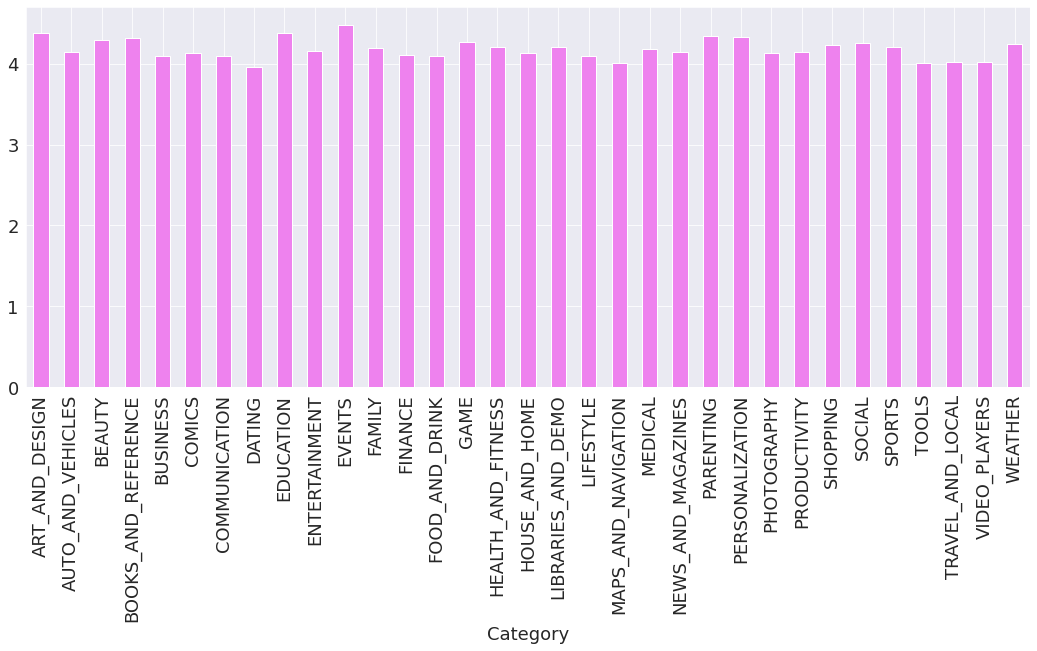

In [34]:
df_avg_placed = df.groupby('Category')['Rating'].mean()
df_avg_placed.plot.bar(color='violet');

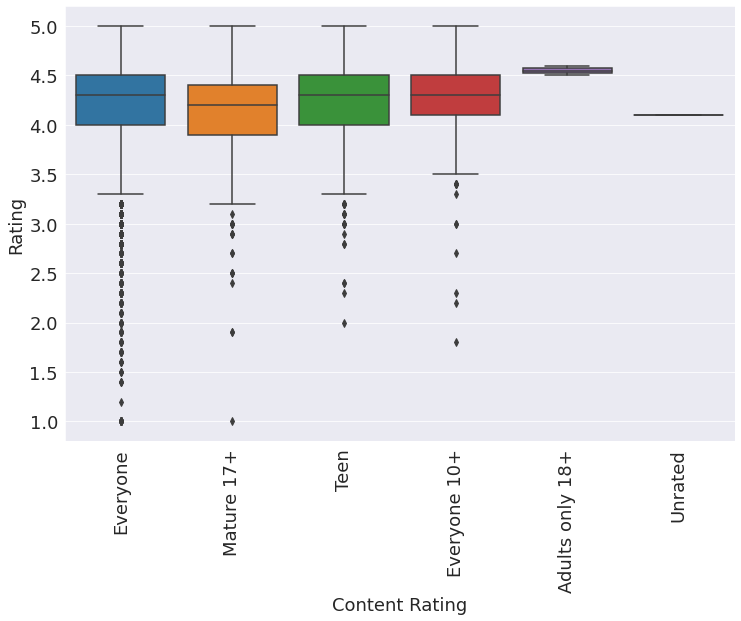

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90);

## Target Variable Selection

In [36]:
num_features.remove('Rating')
X = df[num_features]
Y = df['Rating']

## Data Split Train Test Split

In [37]:

from sklearn.model_selection import train_test_split
#Splitting data into 1/3 for test and the rest for training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=100)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## Model Selection

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print()
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_prediction)))
    print()
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))


In [40]:
predict(GradientBoostingRegressor())

Training score : 0.25479065903047626

Testing score : 1.0

r2 score: 0.09584849669138373
MAE: 0.3570515052323465
MSE: 0.2679523362817138
RMSE: 0.517641126922614


# Model has been developed using Gradient Boost Classifier with Hyper Parameters